In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.6 MB/s eta 0:00:00


In [4]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3Z64ukhZtkaSGicOfJ9g")
project = rf.workspace("microsoft").project("coco")
version = project.version(34)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to COCO-Dataset-34 in yolov8:: 100%|██████████| 430/430 [00:00<00:00, 6959.38it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


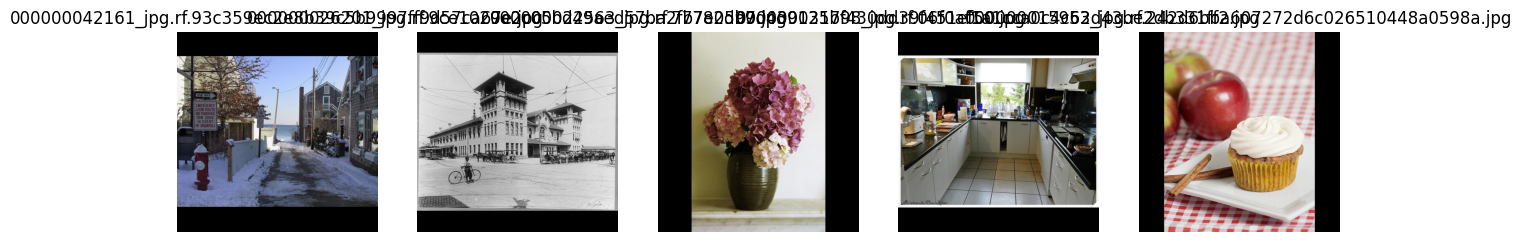

In [5]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the images directory
image_dir = "/kaggle/working/COCO-Dataset-34/train/images"  # Update with your directory path

# Get a list of all image files
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Ensure there are enough images for random sampling, otherwise sample all
sample_size = min(5, len(image_files))  # Sample up to 5 images, or fewer if there aren't enough

# Display the random images
random_images = random.sample(image_files, sample_size)

# Display images
image_paths = [os.path.join(image_dir, img) for img in random_images]
images = [Image.open(img_path) for img_path in image_paths]

# Show the images
fig, axes = plt.subplots(1, sample_size, figsize=(15, 5))
for ax, img, img_path in zip(axes, images, image_paths):
    ax.imshow(img)
    ax.set_title(os.path.basename(img_path))
    ax.axis('off')

plt.show()


In [9]:
from ultralytics import YOLO

# Initialize the YOLO model
model = YOLO("yolov8n.pt")  # 'yolov8n.pt' is the smallest YOLOv8 model; consider 'yolov8s.pt' for larger capacity.

# Train the model with specified parameters
results = model.train(
    data="/kaggle/working/COCO-Dataset-34/data.yaml",  # Adjust path to your data.yaml file
    epochs=200,                      # Number of epochs
    imgsz=640,                      # Image size (e.g., 640x640)
    batch=16,                       # Batch size; adjust according to available GPU memory
    project="yolov8-kaggle-training",  # Directory name to store results
    name="Object_detection",    # Experiment name
    cache=True                      # Cache images in memory for faster training
)

Ultralytics 8.3.37 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/COCO-Dataset-34/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=yolov8-kaggle-training, name=Object_detection3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

train: Scanning /kaggle/working/COCO-Dataset-34/train/labels.cache... 135 images, 3 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (0.2GB RAM): 100%|██████████| 135/135 [00:00<00:00, 889.08it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/COCO-Dataset-34/valid/labels.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 55/55 [00:00<00:00, 227.89it/s]


Plotting labels to yolov8-kaggle-training/Object_detection3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000122, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to yolov8-kaggle-training/Object_detection3
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.56G        1.1      4.987      1.187         63        640: 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.55G      1.073      4.963      1.186         46        640: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.55G      1.075      4.909      1.174         27        640: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.54G      1.114       4.86      1.177         81        640: 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.55G       1.16      4.777      1.146        104        640: 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         55        397          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.58G      1.097      4.556      1.139         53        640: 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         55        397     0.0146    0.00223     0.0085    0.00726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200       2.5G      1.154      4.536      1.159        118        640: 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         55        397     0.0104    0.00425     0.0077     0.0064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.59G      1.185      4.361      1.199         65        640: 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         55        397     0.0174     0.0123     0.0167     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.54G       1.12      4.188      1.159         63        640: 100%|██████████| 9/9 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         55        397    0.00973     0.0324      0.017     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.58G      1.162       3.95      1.156         90        640: 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         55        397    0.00818     0.0428     0.0187      0.016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.59G      1.096       3.97      1.143         86        640: 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         55        397    0.00728     0.0533     0.0184     0.0152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.51G      1.129      3.837      1.167         76        640: 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         55        397    0.00983     0.0725     0.0268     0.0223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.54G      1.179      3.839      1.166         65        640: 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         55        397     0.0151       0.11     0.0365     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.55G      1.152      3.697      1.174         40        640: 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


                   all         55        397     0.0163      0.145     0.0507      0.043

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.55G      1.099      3.614      1.162         38        640: 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         55        397     0.0197      0.174     0.0767     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.51G      1.112      3.507      1.192         41        640: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         55        397      0.816     0.0395     0.0965     0.0819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200       2.5G      1.064      3.339      1.143         75        640: 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         55        397      0.807      0.061      0.104     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.55G      1.107      3.302      1.166         55        640: 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         55        397      0.827     0.0637      0.108     0.0878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.55G      1.105      3.188      1.157         72        640: 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]


                   all         55        397      0.823     0.0691      0.112       0.09

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.51G      1.066      3.138       1.16         69        640: 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


                   all         55        397      0.859     0.0686      0.121     0.0955

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200       2.5G      1.087      3.031      1.154         35        640: 100%|██████████| 9/9 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         55        397      0.736     0.0914      0.141      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.56G      1.106      2.944      1.161         91        640: 100%|██████████| 9/9 [00:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         55        397      0.766     0.0963      0.148      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.51G      1.169      2.921       1.18         81        640: 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         55        397      0.788       0.11      0.168      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.51G      1.062        2.8      1.146        106        640: 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]


                   all         55        397       0.85     0.0995      0.179      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.54G      1.101      2.785      1.147         60        640: 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         55        397       0.86      0.103       0.19      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.51G      1.142      2.696      1.162         89        640: 100%|██████████| 9/9 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         55        397      0.821      0.103      0.194      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.55G      1.125      2.675      1.145         64        640: 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         55        397      0.878      0.102      0.199      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.51G      1.063      2.589      1.171         36        640: 100%|██████████| 9/9 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         55        397      0.694      0.121      0.214      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.54G      1.137      2.548      1.173         62        640: 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         55        397      0.729      0.146      0.219      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.55G      1.078      2.604      1.155         51        640: 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         55        397      0.736      0.126      0.223      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.56G      1.086      2.484      1.148         73        640: 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         55        397      0.676      0.148      0.231      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.56G      1.089      2.472      1.162         83        640: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]


                   all         55        397      0.628      0.168      0.228      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.54G      1.052      2.387      1.135         73        640: 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         55        397      0.551      0.175      0.234      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.58G      1.081      2.343      1.152         76        640: 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         55        397      0.543      0.161      0.235      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.56G      1.044       2.32      1.119        102        640: 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         55        397      0.585      0.167      0.249      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.59G       1.06      2.345       1.13         65        640: 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         55        397      0.546      0.212      0.258      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200       2.5G      1.057      2.251      1.133         57        640: 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         55        397      0.508      0.225      0.268      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.55G      1.066      2.118       1.13         67        640: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         55        397      0.457      0.236      0.269      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.55G       1.07      2.264      1.146         63        640: 100%|██████████| 9/9 [00:02<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


                   all         55        397      0.486       0.24      0.277      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.68G      1.091      2.147      1.152         80        640: 100%|██████████| 9/9 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]


                   all         55        397      0.587      0.237      0.277      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.57G      1.015      2.186      1.109         45        640: 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         55        397      0.594      0.218      0.287      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.58G      1.087      2.013      1.113         46        640: 100%|██████████| 9/9 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         55        397      0.614      0.221      0.274      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.55G       1.05      2.139      1.142         51        640: 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]


                   all         55        397      0.622       0.23      0.273      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.51G      1.006      2.031      1.095         47        640: 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         55        397      0.547      0.233      0.273      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200       2.5G     0.9919      1.958        1.1         62        640: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         55        397      0.584      0.236      0.273      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.55G      1.004      1.946      1.108         54        640: 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         55        397      0.578      0.251      0.275       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.55G      1.015      1.881      1.102         56        640: 100%|██████████| 9/9 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]


                   all         55        397      0.662      0.252       0.28      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.51G      1.054       2.05      1.126         62        640: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]


                   all         55        397      0.703       0.25      0.288      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.54G       1.04      1.848      1.105         98        640: 100%|██████████| 9/9 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]


                   all         55        397      0.652      0.259      0.286      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.55G      1.034      1.883      1.116         66        640: 100%|██████████| 9/9 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         55        397      0.619      0.248      0.287       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.51G      1.012      1.829      1.102         62        640: 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]


                   all         55        397      0.595      0.238      0.291      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.51G      1.022      1.895      1.115         92        640: 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


                   all         55        397       0.46      0.288      0.298       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.57G     0.9853       1.82      1.093         41        640: 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         55        397      0.463      0.271      0.291      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.51G      0.956      1.786      1.084         55        640: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         55        397      0.482      0.267      0.288      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.55G      1.086      1.826      1.132         54        640: 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


                   all         55        397        0.5       0.27      0.294      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.51G     0.9904      1.792      1.098         81        640: 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all         55        397      0.543      0.282      0.297      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.54G     0.9439      1.753      1.078         88        640: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]


                   all         55        397      0.582      0.273      0.312      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.51G      1.009      1.769      1.103         82        640: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         55        397      0.606      0.279      0.316      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.51G      1.002      1.788      1.089         75        640: 100%|██████████| 9/9 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]


                   all         55        397      0.543      0.293      0.325      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.55G     0.9955      1.735      1.092         65        640: 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]


                   all         55        397      0.564      0.292      0.326      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.54G     0.9788      1.655      1.085        120        640: 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         55        397      0.554      0.309      0.328       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.59G      1.023       1.68      1.084        104        640: 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         55        397      0.589      0.286      0.323      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.51G     0.9355      1.626      1.076         52        640: 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         55        397      0.563       0.31      0.325      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.51G     0.9093      1.653      1.074         43        640: 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


                   all         55        397      0.542       0.32      0.328      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.58G     0.9514      1.556      1.077         53        640: 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         55        397      0.544      0.319       0.33      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.51G     0.9773      1.731      1.094         56        640: 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]


                   all         55        397       0.56      0.319      0.331      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.54G       0.95      1.642      1.084         39        640: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]


                   all         55        397      0.519      0.328      0.335      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.55G     0.9407      1.582      1.065         74        640: 100%|██████████| 9/9 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         55        397      0.492      0.312      0.326       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200       2.5G      0.946      1.605       1.08         74        640: 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         55        397      0.525      0.295      0.327      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.51G     0.9173      1.556       1.06         44        640: 100%|██████████| 9/9 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         55        397      0.527      0.314      0.341      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.54G     0.9449      1.531      1.068         78        640: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         55        397      0.568      0.316      0.353      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.51G     0.9289       1.54       1.07         55        640: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]


                   all         55        397      0.686       0.29      0.339      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.54G     0.9783      1.607      1.077         63        640: 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]


                   all         55        397      0.692       0.29      0.338      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.51G     0.9174      1.469      1.054         54        640: 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         55        397      0.687      0.297      0.341      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.51G     0.9294      1.516      1.068         41        640: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]


                   all         55        397      0.661      0.308      0.344      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.54G     0.9311      1.569      1.073         81        640: 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]


                   all         55        397      0.641      0.292      0.346      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.54G     0.9425      1.535      1.081         70        640: 100%|██████████| 9/9 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         55        397      0.651      0.292      0.343       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.58G     0.9682      1.523      1.086         56        640: 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         55        397      0.661      0.292      0.341      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.55G     0.8871       1.57      1.079         31        640: 100%|██████████| 9/9 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


                   all         55        397      0.652      0.295      0.339      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.59G     0.8887      1.416      1.064         55        640: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         55        397      0.664      0.296      0.344      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200       2.5G      0.952      1.459      1.067         66        640: 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


                   all         55        397      0.691      0.284      0.347      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.55G     0.9071      1.453      1.054         67        640: 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         55        397      0.673      0.294      0.347      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.55G     0.9317      1.571      1.076         34        640: 100%|██████████| 9/9 [00:02<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         55        397      0.666      0.278      0.338      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.59G     0.9271       1.44      1.052         52        640: 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


                   all         55        397      0.582      0.319      0.343      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.54G     0.9168      1.497      1.057         81        640: 100%|██████████| 9/9 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         55        397      0.657      0.295      0.357       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.51G      0.919      1.435      1.054         66        640: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


                   all         55        397       0.68      0.279      0.353      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.55G     0.9192      1.412      1.051         81        640: 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         55        397      0.684      0.287      0.354      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.57G     0.9612      1.438      1.075        107        640: 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


                   all         55        397      0.612      0.312      0.356      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.59G     0.9001      1.399      1.028        101        640: 100%|██████████| 9/9 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         55        397      0.591       0.31      0.351      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.59G     0.8979      1.364      1.032         77        640: 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]


                   all         55        397      0.565      0.335      0.353      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.51G     0.8563      1.344      1.027        105        640: 100%|██████████| 9/9 [00:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


                   all         55        397      0.581      0.339      0.352       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.57G      0.901      1.395      1.044         81        640: 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         55        397      0.557      0.291      0.338      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200       2.5G     0.8727      1.468      1.066         25        640: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         55        397      0.569      0.289      0.337      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.59G     0.8799      1.337       1.04         36        640: 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]


                   all         55        397      0.563      0.288      0.329      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.54G     0.8562       1.34      1.023         56        640: 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


                   all         55        397      0.556       0.29      0.334      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.55G     0.8937      1.401      1.054         69        640: 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         55        397      0.534      0.291      0.348      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.54G     0.9039      1.342      1.051         78        640: 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]


                   all         55        397      0.479      0.341      0.343      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.51G     0.9126      1.371      1.038         52        640: 100%|██████████| 9/9 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         55        397      0.487      0.338       0.34      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.51G     0.9032      1.309      1.033         51        640: 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]


                   all         55        397      0.528      0.329      0.343      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.55G     0.8297      1.409       1.05         67        640: 100%|██████████| 9/9 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         55        397      0.528      0.337      0.337       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200       2.5G     0.9472      1.343      1.054         96        640: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


                   all         55        397      0.542      0.326      0.334      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.55G     0.9226      1.386      1.055         49        640: 100%|██████████| 9/9 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all         55        397      0.524      0.323      0.338      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.51G     0.8729       1.38      1.035         45        640: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         55        397      0.523      0.315      0.344      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.51G     0.9084      1.334      1.032         66        640: 100%|██████████| 9/9 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


                   all         55        397      0.521      0.318      0.344      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.54G     0.8622      1.325      1.016         70        640: 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         55        397       0.56      0.347      0.362      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.51G     0.8666      1.325      1.054         32        640: 100%|██████████| 9/9 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


                   all         55        397      0.545       0.34      0.347      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.69G     0.8826      1.296      1.056         71        640: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         55        397      0.546      0.326      0.341      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.57G     0.8417      1.308      1.024         57        640: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         55        397      0.532      0.337      0.343      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.54G     0.8669      1.404      1.043         72        640: 100%|██████████| 9/9 [00:02<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         55        397       0.51      0.347      0.362      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.55G     0.9033      1.397      1.032         64        640: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         55        397        0.5      0.348      0.362      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.55G     0.8786      1.322      1.039         57        640: 100%|██████████| 9/9 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         55        397      0.509      0.353      0.361      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.51G     0.8422      1.249      1.005         62        640: 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         55        397      0.526      0.336      0.363      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.54G     0.8523      1.293      1.035         95        640: 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         55        397      0.645      0.295      0.365      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.55G     0.9017      1.316      1.043         77        640: 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]


                   all         55        397      0.551      0.321      0.363      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.51G     0.9226      1.328       1.05         96        640: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


                   all         55        397      0.583      0.319      0.358      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.51G     0.8702      1.286      1.031         69        640: 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


                   all         55        397      0.521      0.326      0.357      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.59G      0.843      1.321      1.029         71        640: 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


                   all         55        397      0.543       0.33      0.357      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.51G     0.8653      1.274      1.044         81        640: 100%|██████████| 9/9 [00:02<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         55        397       0.53      0.321      0.347      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.55G      0.834      1.269      1.019         48        640: 100%|██████████| 9/9 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         55        397      0.572      0.316      0.349      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.51G     0.8569      1.295      1.039         97        640: 100%|██████████| 9/9 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]


                   all         55        397      0.548      0.315      0.344      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200       2.5G     0.8306      1.266      1.027         83        640: 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         55        397      0.547      0.315      0.344      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.51G     0.8618      1.278      1.052         56        640: 100%|██████████| 9/9 [00:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         55        397      0.569      0.292      0.343      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.51G     0.8659       1.38      1.053         38        640: 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


                   all         55        397       0.53      0.309      0.343      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.59G     0.8554       1.27      1.026         71        640: 100%|██████████| 9/9 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         55        397      0.479      0.311      0.341      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.59G     0.8281       1.28      1.029         55        640: 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


                   all         55        397      0.479       0.31      0.339      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.56G     0.8041      1.254      1.025         24        640: 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]


                   all         55        397      0.506      0.343      0.347      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.51G     0.7854      1.198     0.9993         73        640: 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         55        397      0.538      0.336      0.343      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.54G     0.8128      1.196      1.016         36        640: 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]


                   all         55        397      0.517      0.344      0.347      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.67G     0.8308      1.251      1.026         76        640: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         55        397      0.562       0.31      0.348      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.47G     0.8061      1.276      1.034         33        640: 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]


                   all         55        397      0.557      0.311      0.339      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.56G     0.8131      1.246      1.022         62        640: 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         55        397      0.564      0.307      0.343      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.51G     0.8116       1.23      1.027         82        640: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         55        397      0.564      0.304      0.344      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.54G     0.8218      1.275      1.002         43        640: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]


                   all         55        397      0.515      0.314      0.342      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.59G     0.7886      1.183      1.005         51        640: 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         55        397      0.522      0.298      0.338      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.56G      0.859      1.245      1.016         79        640: 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]


                   all         55        397       0.52      0.311      0.364      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.57G     0.8182      1.253      1.009         58        640: 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         55        397      0.535       0.31       0.36      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.54G     0.7974      1.187      0.995         64        640: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         55        397       0.53      0.316      0.357      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.59G      0.833      1.183      1.018         92        640: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


                   all         55        397      0.525      0.309      0.356      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.55G     0.8328      1.166      1.016         72        640: 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         55        397      0.528      0.329       0.35      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.55G     0.8253      1.229       1.02         46        640: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         55        397      0.533      0.327      0.354      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.59G     0.8258      1.163      1.008         95        640: 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


                   all         55        397      0.569      0.321      0.353      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.51G     0.8237      1.199      1.014         51        640: 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         55        397       0.55      0.313      0.351      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.55G     0.8201      1.187          1         94        640: 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         55        397      0.557      0.327      0.352      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.59G     0.8383      1.165          1         51        640: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


                   all         55        397      0.558       0.32      0.353      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.54G     0.7939      1.166      1.007         42        640: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]


                   all         55        397       0.57       0.31      0.338      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.51G     0.7704      1.168      1.016        103        640: 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         55        397      0.546      0.307      0.339      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.55G     0.8171      1.207      1.017         89        640: 100%|██████████| 9/9 [00:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         55        397      0.559      0.312      0.355      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.51G     0.8346      1.209      1.027         53        640: 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         55        397      0.563      0.316      0.339      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.58G     0.8256      1.173      1.026         41        640: 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         55        397       0.57      0.327      0.342      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.51G     0.8427      1.216      1.029        124        640: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]


                   all         55        397      0.567      0.311      0.343      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.51G     0.8299      1.259      1.023         50        640: 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         55        397      0.557      0.312      0.348      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.51G     0.8337      1.221      1.016        133        640: 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


                   all         55        397      0.566      0.304      0.349      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.65G     0.8152      1.161      1.006         77        640: 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]


                   all         55        397      0.529      0.306      0.346      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.56G     0.7905      1.162      1.007         58        640: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


                   all         55        397       0.52      0.302      0.353      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.47G     0.7581      1.129     0.9939         64        640: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


                   all         55        397      0.532      0.318      0.352      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.55G     0.7998      1.133     0.9815        108        640: 100%|██████████| 9/9 [00:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         55        397       0.53       0.34      0.351      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200       2.5G     0.8115      1.284      1.021         49        640: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


                   all         55        397      0.517      0.341      0.352       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.55G     0.8382      1.192      1.015        116        640: 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         55        397      0.522       0.34      0.351      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.55G     0.8125      1.189      1.011         75        640: 100%|██████████| 9/9 [00:02<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         55        397      0.521      0.339      0.352       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.51G     0.8279      1.146      1.014         48        640: 100%|██████████| 9/9 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]


                   all         55        397      0.514      0.307       0.35      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.58G     0.8205      1.183      1.019         52        640: 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


                   all         55        397      0.506      0.296       0.34       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.55G     0.7896      1.172      0.989         87        640: 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         55        397      0.505      0.301      0.343      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.51G     0.8342      1.152      1.016         63        640: 100%|██████████| 9/9 [00:02<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]


                   all         55        397      0.492      0.329      0.352      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.66G      0.816      1.165       1.01         91        640: 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         55        397        0.5      0.326      0.358      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.54G     0.7598      1.122      1.012         46        640: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         55        397      0.498      0.328      0.361      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.51G     0.7681      1.132     0.9957         67        640: 100%|██████████| 9/9 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         55        397      0.509      0.335       0.36      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.51G     0.8325      1.148      1.028         80        640: 100%|██████████| 9/9 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         55        397      0.515      0.337      0.363      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.51G     0.7769      1.144      1.006         78        640: 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


                   all         55        397      0.519      0.334      0.362      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.54G      0.776       1.19     0.9951        114        640: 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         55        397      0.521      0.341      0.363      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.55G     0.8376      1.146      1.011         42        640: 100%|██████████| 9/9 [00:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         55        397      0.537      0.313      0.362      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.55G     0.7899      1.141      1.002         72        640: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         55        397      0.528      0.311      0.361      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.51G     0.7542       1.13      1.007         51        640: 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         55        397      0.502      0.313      0.359      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.58G     0.8041      1.112      1.016         70        640: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         55        397      0.502      0.315      0.356      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.55G      0.828      1.161      1.011         68        640: 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]


                   all         55        397      0.515      0.309      0.361      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.55G     0.7862      1.152     0.9871         81        640: 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]


                   all         55        397      0.518      0.327      0.357      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.58G     0.7932      1.145     0.9937         79        640: 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         55        397      0.509      0.334      0.356       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.54G     0.8224      1.155      1.021         68        640: 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         55        397      0.521      0.326      0.355      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.51G     0.7668      1.129     0.9983        130        640: 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


                   all         55        397      0.516       0.32      0.357      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.55G     0.8214      1.134     0.9981         73        640: 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         55        397      0.533       0.31      0.349      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.51G     0.7688       1.08      1.017         29        640: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]


                   all         55        397      0.531      0.326      0.361      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200       2.5G     0.8027      1.127     0.9836         60        640: 100%|██████████| 9/9 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]


                   all         55        397      0.519      0.351      0.358      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.57G     0.8052      1.151     0.9918         59        640: 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         55        397      0.522      0.335       0.36      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.55G     0.7985      1.148      1.016         52        640: 100%|██████████| 9/9 [00:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         55        397      0.523      0.355      0.361      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.56G     0.8203       1.12      1.019         48        640: 100%|██████████| 9/9 [00:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]


                   all         55        397       0.52      0.356      0.359      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.54G     0.7556      1.074     0.9935         84        640: 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]


                   all         55        397      0.509      0.353      0.354      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.54G     0.8633      1.175      1.001        101        640: 100%|██████████| 9/9 [00:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]


                   all         55        397      0.508       0.35      0.355      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.51G     0.7538      1.132     0.9873         71        640: 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

                   all         55        397      0.513      0.346      0.355      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.56G       0.79      1.139     0.9869         60        640: 100%|██████████| 9/9 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         55        397      0.524      0.308      0.359      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.54G     0.7534      1.107     0.9946         75        640: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


                   all         55        397      0.512      0.313       0.35       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.58G     0.8246      1.139      1.004        119        640: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         55        397      0.507      0.305      0.358      0.267


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.55G     0.7626      1.168      1.002         34        640: 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]


                   all         55        397      0.517      0.341      0.362      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.51G     0.8134      1.271      1.008         22        640: 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         55        397      0.484      0.358      0.367      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.54G     0.7752      1.253     0.9967         24        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]


                   all         55        397      0.439      0.356      0.367      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.51G     0.7821      1.151     0.9772         73        640: 100%|██████████| 9/9 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         55        397      0.426      0.375      0.364      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.51G     0.8049      1.225      1.032         26        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         55        397      0.441      0.336      0.365      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.47G      0.751      1.158      1.011         38        640: 100%|██████████| 9/9 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         55        397      0.431      0.356      0.367      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200       2.5G     0.7661      1.123     0.9963         41        640: 100%|██████████| 9/9 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         55        397      0.446      0.337      0.366      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.47G     0.7612      1.177      1.005         41        640: 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all         55        397      0.418      0.335      0.363      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.51G     0.7761      1.192      1.019         33        640: 100%|██████████| 9/9 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         55        397      0.413       0.34      0.364      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.47G     0.7439      1.114     0.9904         40        640: 100%|██████████| 9/9 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         55        397      0.409      0.358      0.363      0.259



200 epochs completed in 0.225 hours.
Optimizer stripped from yolov8-kaggle-training/Object_detection3/weights/last.pt, 6.5MB
Optimizer stripped from yolov8-kaggle-training/Object_detection3/weights/best.pt, 6.5MB

Validating yolov8-kaggle-training/Object_detection3/weights/best.pt...
Ultralytics 8.3.37 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,134,342 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]


                   all         55        397      0.566      0.302      0.362      0.271
              backpack          1          1          0          0          0          0
                banana          1          2          1          0          0          0
          baseball bat          1          1          1          0          0          0
        baseball glove          1          4          1          0          0          0
                 bench          3          4          1          0     0.0243    0.00487
               bicycle          3          3      0.223      0.333      0.399      0.289
                  bird          2          4          0          0          0          0
                  boat          1          1          1          0      0.995      0.796
                bottle          4          7     0.0921      0.143      0.103     0.0728
                   bus          3          3      0.247      0.667      0.432      0.375
                  cak

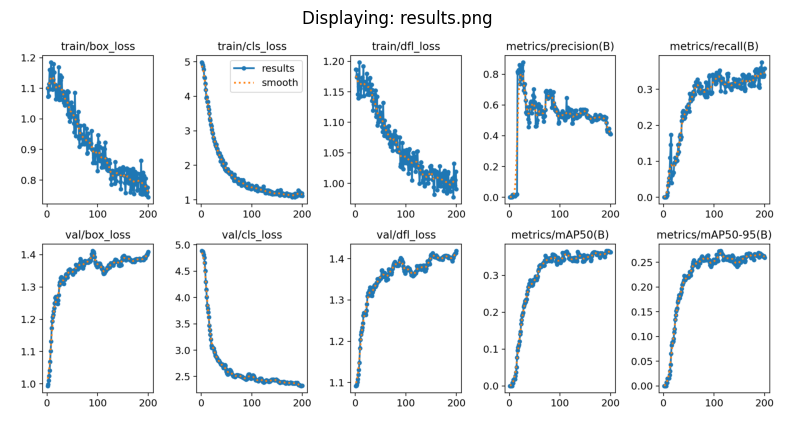

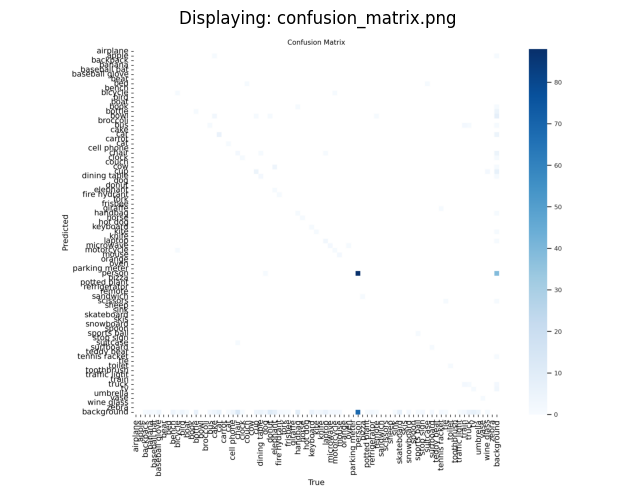

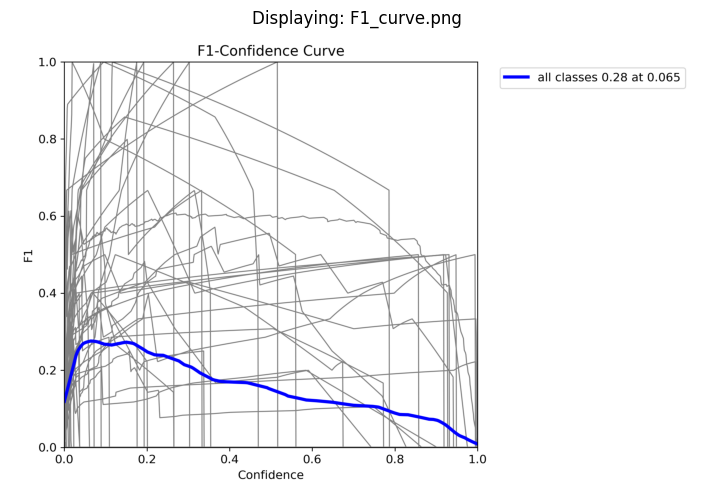

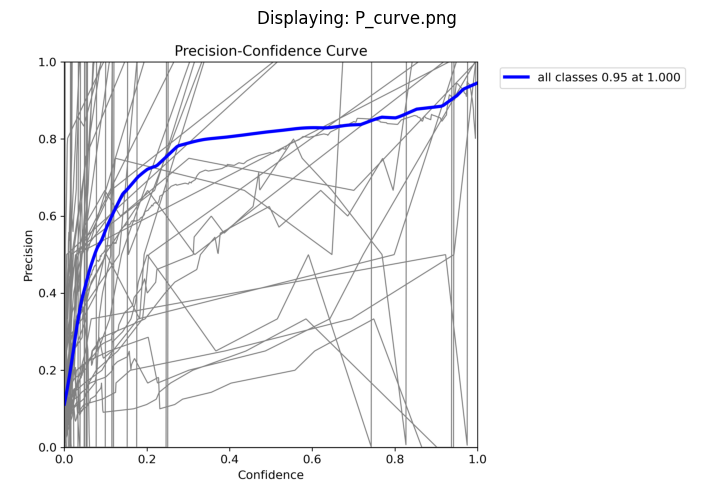

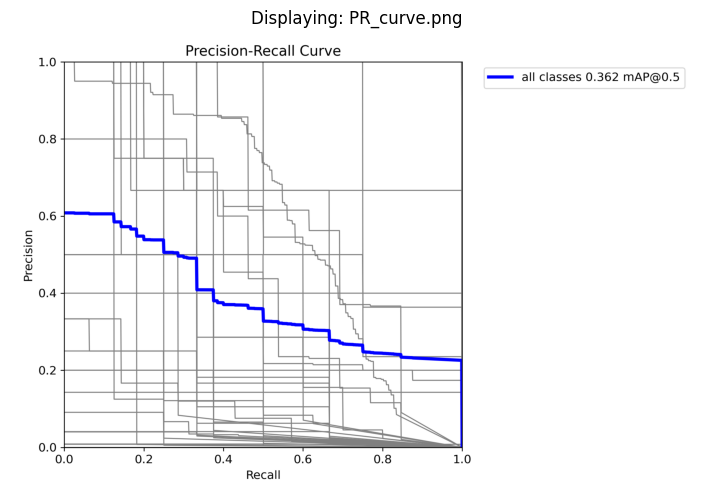

In [10]:
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

# Define the directory where the plots are saved
results_dir = "/kaggle/working/yolov8-kaggle-training/Object_detection3"

# List of plot files to display
plot_files = [
    "results.png",                # Overall training results plot
    "confusion_matrix.png",       # Confusion matrix plot
    "F1_curve.png", # Precision-recall curve plot
    "P_curve.png",              # Loss plot
    "PR_curve.png",             # Train loss plot
]

# Iterate over each plot file and display it using matplotlib
for plot_file in plot_files:
    plot_path = os.path.join(results_dir, plot_file)
    
    # Check if the plot file exists
    if os.path.exists(plot_path):
        # Load the plot image
        img = mpimg.imread(plot_path)
        
        # Display the image
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.title(f"Displaying: {plot_file}")
        plt.show()
    else:
        print(f"{plot_file} not found in {results_dir}")
